In [5]:
import kagglehub

path = kagglehub.dataset_download("apoorvwatsky/miraclvc1")

print("Path to dataset files:", path)

Path to dataset files: /home/vaibhav/.cache/kagglehub/datasets/apoorvwatsky/miraclvc1/versions/3


In [13]:
import numpy as np
import os
import imutils
import dlib 
import cv2 

import imageio
from imutils import face_utils
import multiprocessing
import functools

In [7]:
def rect_to_bb(rect):
  x = rect.left()
  y = rect.top()
  w = rect.right() - x
  h = rect.bottom() - y
  return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
  coords = np.zeros((68, 2), dtype=dtype)
  for i in range(0, 68):
    coords[i] = (shape.part(i).x, shape.part(i).y)
  return coords

In [14]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/home/vaibhav/.cache/kagglehub/datasets/apoorvwatsky/miraclvc1/versions/3/shape_predictor_68_face_landmarks.dat')

@functools.lru_cache(maxsize=None)  # Use caching for crop_and_save_image
def crop_and_save_image(img_path, write_img_path):
    try:
        image = cv2.imread(img_path)
        image = imutils.resize(image, width=500)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        rects = detector(gray, 1)
        if len(rects) > 1:
            print("ERROR: more than one face detected")
            return
        if len(rects) < 1:
            print("ERROR: no faces detected")
            return
# reads an image and converts it to grayscale.
        for (i, rect) in enumerate(rects):
            shape = predictor(gray, rect)
            shape = face_utils.shape_to_np(shape)
            name, i, j = 'mouth', 48, 68
            clone = gray.copy()

            (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
            roi = gray[y:y + h, x:x + w]
            roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)
            cv2.imwrite('cropped/' + write_img_path, roi)
            
    except FileNotFoundError:
        print(f"WARNING: Image file not found: {img_path}")
        return  # Continue with the next image



def process_person(person_ID):
    for data_type in data_types:
        for phrase_ID in folder_enum:
            for instance_ID in instances:
                directory = '/home/vaibhav/.cache/kagglehub/datasets/apoorvwatsky/miraclvc1/versions/3/dataset/dataset/' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID + '/'
                dir_temp = person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID + '/'
               
                if not os.path.exists(directory):
                    print(f"WARNING: Directory not found: {directory}")
                    continue
                
                filelist = os.listdir(directory)

                for img_name in filelist:
                    if img_name.startswith('color'):
                        img_path = directory + img_name
                        write_img_path = dir_temp + img_name
                        
                        if not os.path.exists(img_path):  # Check if image file exists
                            print(f"WARNING: Image file not found: {img_path}")
                            continue  # Skip this image and continue with the next

                        # Check if the image has already been cropped and cached
                        if not os.path.exists('cropped/' + write_img_path):
                            try:
                                crop_and_save_image(img_path, write_img_path)  # Cache the result
                            except Exception as e:
                                print(f"ERROR: Failed to process image {img_path}: {e}")
                                continue

def crop_all_persons():
    if not os.path.exists('cropped'):
        os.mkdir('cropped')
    
    for person_ID in people:
        if not os.path.exists('cropped/' + person_ID):
            os.mkdir('cropped/' + person_ID + '/')
        
        for data_type in data_types:
            if not os.path.exists('cropped/' + person_ID + '/' + data_type):
                os.mkdir('cropped/' + person_ID + '/' + data_type)
            
            for phrase_ID in folder_enum:
                if not os.path.exists('cropped/' + person_ID + '/' + data_type + '/' + phrase_ID):
                    os.mkdir('cropped/' + person_ID + '/' + data_type + '/' + phrase_ID)
                    
                for instance_ID in instances:
                    if not os.path.exists('cropped/' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID):
                        os.mkdir('cropped/' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID)
    # Use multiprocessing to process people in parallel
    with multiprocessing.Pool() as pool:
        pool.map(process_person, people)

In [15]:
os.listdir('/home/vaibhav/.cache/kagglehub/datasets/apoorvwatsky/miraclvc1/versions/3/dataset/dataset')
predictor = dlib.shape_predictor('/home/vaibhav/.cache/kagglehub/datasets/apoorvwatsky/miraclvc1/versions/3/shape_predictor_68_face_landmarks.dat')

In [16]:
people = ['F01','F02','F04','F05','F06','F07','F08','F09', 'F10','F11','M01','M02','M04','M07','M08']
data_types = ['words']
folder_enum = ['01','02','03','04','05']
instances = ['01','02']

words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']          
words_di = {i:words[i] for i in range(len(words))}

In [17]:
import shutil

def crop_one_person():      
    
#     people = ['F01','F02','F04']
#     data_types = ['words']
#     folder_enum = ['01','02']
#     instances = ['01','02']

    i = 1
    for person_ID in people:
        if not os.path.exists('cropped/' + person_ID ):
            os.mkdir('cropped/' + person_ID + '/')

        for data_type in data_types:
            if not os.path.exists('cropped/' + person_ID + '/' + data_type):
                os.mkdir('cropped/' + person_ID + '/' + data_type)

            for phrase_ID in folder_enum:
                if not os.path.exists('cropped/' + person_ID + '/' + data_type + '/' + phrase_ID):
                    # F01/phrases/01
                    os.mkdir('cropped/' + person_ID + '/' + data_type + '/' + phrase_ID)

                for instance_ID in instances:
                    # F01/phrases/01/01
                    directory = '/home/vaibhav/.cache/kagglehub/datasets/apoorvwatsky/miraclvc1/versions/3/dataset/dataset/' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID + '/'
                    dir_temp = person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID + '/'
    #                 print(directory)
                    filelist = os.listdir(directory)
                    if not os.path.exists('cropped/' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID):
                        os.mkdir('cropped/' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID)

                        for img_name in filelist:
                            if img_name.startswith('color'):
                                image = imageio.imread(directory + '' + img_name)
                                try:
                                  crop_and_save_image(image, directory + '' + img_name,dir_temp + '' + img_name, img_name)
                                except:
                                  continue

    print(f'Iteration : {i}')
    i += 1

In [12]:
import time
os.mkdir('cropped')
times = 0
for _ in range(7):
    t1 = time.time()
    crop_one_person()
    t2 = time.time()
    times += (t2 - t1)

print("Average time over 7 iterations : ", times/7)

FileExistsError: [Errno 17] File exists: 'cropped'

In [ ]:
max_seq_length = 22

X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []


MAX_WIDTH = 100
MAX_HEIGHT = 100

In [ ]:
from skimage.transform import resize
import time

In [ ]:
t1 = time.time()
UNSEEN_VALIDATION_SPLIT = ['F07', 'M02']
UNSEEN_TEST_SPLIT = ['F04','M01']

directory = "/home/vaibhav/project/cropped"

for person_id in people:
    tx1 = time.time()
    for data_type in data_types:
        for word_index, word in enumerate(folder_enum):
#             print(f"Word : '{words[word_index]}'")
            for iteration in instances:
                path = os.path.join(directory, person_id, data_type, word, iteration)
                filelist = sorted(os.listdir(path + '/'))
                sequence = [] 
                for img_name in filelist:
                    if img_name.startswith('color'):
                        image = imageio.imread(path + '/' + img_name)
                        image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
                        image = 255 * image
                        # Convert to integer data type pixels.
                        image = image.astype(np.uint8)
                        sequence.append(image)                        
                pad_array = [np.zeros((MAX_WIDTH, MAX_HEIGHT))]                            
                sequence.extend(pad_array * (max_seq_length - len(sequence)))
                #sequence = np.array(sequence)
                                
                if person_id in UNSEEN_TEST_SPLIT:
                    X_test.append(sequence)
                    y_test.append(word_index)
                elif person_id in UNSEEN_VALIDATION_SPLIT:
                    X_val.append(sequence)
                    y_val.append(word_index)
                else:
                    X_train.append(sequence)
                    y_train.append(word_index)    
    tx2 = time.time()
    print(f'Finished reading images for person {person_id}. Time taken : {tx2 - tx1} secs.')    
    
t2 = time.time()
print(f"Time taken for creating constant size 3D Tensors from those cropped lip regions : {t2 - t1} secs.")

Finished reading images for person F01. Time taken : 0.0013263225555419922 secs.
Finished reading images for person F02. Time taken : 0.0004012584686279297 secs.
Finished reading images for person F04. Time taken : 0.00022673606872558594 secs.
Finished reading images for person F05. Time taken : 0.00023412704467773438 secs.
Finished reading images for person F06. Time taken : 0.0004355907440185547 secs.
Finished reading images for person F07. Time taken : 0.00022482872009277344 secs.
Finished reading images for person F08. Time taken : 0.00026702880859375 secs.
Finished reading images for person F09. Time taken : 0.0002396106719970703 secs.
Finished reading images for person F10. Time taken : 0.00023365020751953125 secs.
Finished reading images for person F11. Time taken : 0.0002033710479736328 secs.
Finished reading images for person M01. Time taken : 0.00020241737365722656 secs.
Finished reading images for person M02. Time taken : 0.00020742416381835938 secs.
Finished reading images 

In [ ]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [ ]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(110, 22, 100, 100)
(20, 22, 100, 100)
(20, 22, 100, 100)


In [ ]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(110,)
(20,)
(20,)


In [ ]:
def normalize_it(X):
    v_min = X.min(axis=(2, 3), keepdims=True)
    v_max = X.max(axis=(2, 3), keepdims=True)

    # Calculate the range and replace zero values with epsilon to avoid division by zero
    range_values = np.where((v_max - v_min) == 0, np.finfo(float).eps, v_max - v_min)

    # Normalize the data
    X_normalized = np.where(range_values == 0, 0, (X - v_min) / range_values)

    return X_normalized

In [ ]:
from keras.utils import to_categorical

2025-03-25 20:30:10.360732: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-25 20:30:10.481499: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-25 20:30:10.565628: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742914810.636878   18329 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742914810.659403   18329 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742914810.832330   18329 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [ ]:
X_train = normalize_it(X_train)
X_val = normalize_it(X_val)
X_test = normalize_it(X_test)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_val = to_categorical(y_val, 10)

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)
X_val, y_val = shuffle(X_val, y_val, random_state=0)

In [ ]:
X_train = np.expand_dims(X_train, axis=4)
X_val = np.expand_dims(X_val, axis=4)
X_test = np.expand_dims(X_test, axis=4)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(110, 22, 100, 100, 1)
(20, 22, 100, 100, 1)
(20, 22, 100, 100, 1)


In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(110, 10)
(20, 10)
(20, 10)


In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv3D, MaxPooling3D

In [ ]:
model = Sequential()

# 1st layer group
model.add(Conv3D(64, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(256, (2, 2, 2), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(512, (1, 1, 1), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(1, 1, 1), strides=2))

model.add((Flatten()))

# # FC layers group
model.add(Dense(4096, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
model.summary()

print(X_val.shape)
print(y_val.shape)
print(X_train.shape)
print(y_train.shape)

/home/vaibhav/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1742914841.726370   18329 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1742914841.726849   18329 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-03-25 20:30:41.797313: W external/local

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 20, 98, 98, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 10, 49, 49, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 8, 47, 47, 128) │       221,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 4, 23, 23, 128) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 3, 22, 22, 256) │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 1, 11, 11, 256) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_3 (Conv3D)               │ (None, 1, 11, 11, 512) │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_3 (MaxPooling3D)  │ (None, 1, 6, 6, 512)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    75,501,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,617,738 (330.42 MB)

 Trainable params: 86,617,738 (330.42 MB)

 Non-trainable params: 0 (0.00 B)

(20, 22, 100, 100, 1)
(20, 10)
(110, 22, 100, 100, 1)
(110, 10)


In [ ]:
import time

t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/100


2025-03-25 20:30:54.046483: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2025-03-25 20:30:54.046545: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.


7/7 ━━━━━━━━━━━━━━━━━━━━ 59s 8s/step - accuracy: 0.1543 - loss: 2.3022 - val_accuracy: 0.2000 - val_loss: 2.3008
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 57s 8s/step - accuracy: 0.1908 - loss: 2.3005 - val_accuracy: 0.2000 - val_loss: 2.2994
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 56s 8s/step - accuracy: 0.2122 - loss: 2.2991 - val_accuracy: 0.2000 - val_loss: 2.2982
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 56s 8s/step - accuracy: 0.1397 - loss: 2.2980 - val_accuracy: 0.2000 - val_loss: 2.2972
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 57s 8s/step - accuracy: 0.2145 - loss: 2.2969 - val_accuracy: 0.2000 - val_loss: 2.2962
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 56s 8s/step - accuracy: 0.2056 - loss: 2.2960 - val_accuracy: 0.2000 - val_loss: 2.2953
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 58s 8s/step - accuracy: 0.2439 - loss: 2.2951 - val_accuracy: 0.2000 - val_loss: 2.2945
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 62s 9s/step - accuracy: 0.2368 - loss: 2.2943 - val_accuracy: 0.2000 - val_loss: 2.2937
Epoch 9/100


In [ ]:
import pickle

In [ ]:
with open("history.pkl", "wb") as file:
    pickle.dump(history, file)



In [18]:
import pickle

with open('history.pkl', 'rb') as file:
    history = pickle.load(file)

2025-03-26 13:49:23.397300: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-26 13:49:23.507317: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-26 13:49:23.592418: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742977163.668929  171828 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742977163.691859  171828 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742977163.871937  171828 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

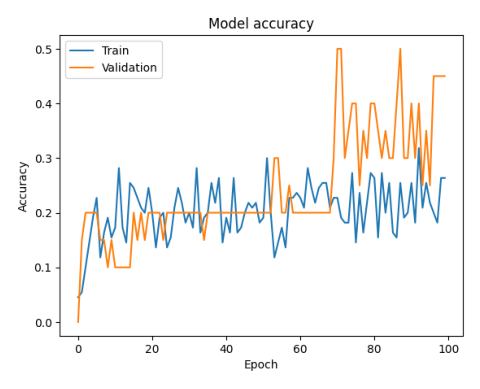

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


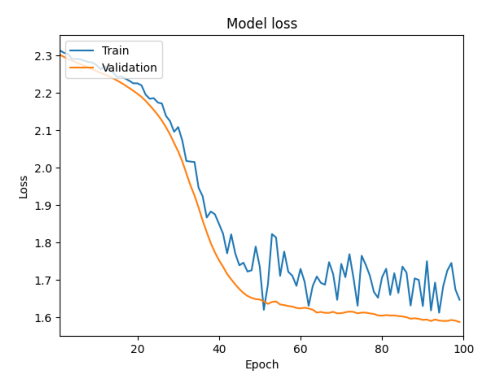

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xlim(1, 100)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
